### Distancia de luminosidad $D_L$

In [203]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import math

#Constantes
H_0 = 72
#c en mpc/s??  
c= 9.71e-8 
#c= 3e8

f = open("C:/Users/antoc/Downloads/PortableGit/practica2024/lcparam_full_long.txt")
#print(f.readlines())
lineas = f.readlines()

# Divide cada línea en columnas usando espacio como separador
datos_separados = [linea.strip().split(' ') for linea in lineas]

datos= []
for fila in datos_separados:
    datos.append(fila)
    #print(fila)

#print('datos:',datos)
f.close()

z_cmb = []
for i in range(1,len(datos)):
  a= float(datos[i][1])
  z_cmb.append(a)

#print('z_cmb:', z_cmb)


m_b = []
for i in range(1, len(datos)):
  a= float(datos[i][4])
  m_b.append(a)

#print('m_b:', m_b)

dm_b = []
for i in range(1, len(datos)):
    a= float(datos[i][5])
    dm_b.append(a)

#print('dm_b:', dm_b)


#Relación magnitud aparente y absoluta con distancia de luminosidad
M = -19.3
D_L = np.zeros(len(m_b))
for i in range(len(m_b)):
  D_L[i]= 10**((m_b[i]-M-25)/5)
  
#print('D_L:', D_L)


In [204]:
#utilizando propagación de errores
dD = []
for i in range(len(dm_b)):
  a= (2**((m_b[i]-M-25)/5)) * (5**(((m_b[i]-M-25)/5)-1))* np.log(10) * dm_b[i]
  dD.append(a)

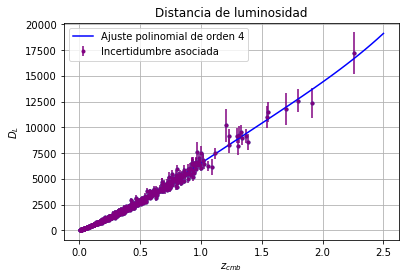

In [205]:
# Ajustar modelo polinomial grado 4
model = np.poly1d(np.polyfit(z_cmb, D_L, 4))

# Crear polilínea de diagrama de dispersión
polyline = np.linspace(0, 2.5, 50)
plt.plot(z_cmb, D_L, '.')

# Añadir líneas polinomiales ajustadas al diagrama de dispersión
plt.xlabel('$ z_{cmb} $')
plt.ylabel('$ D_L $')
plt.errorbar(z_cmb, D_L, yerr=dD, fmt='.', color='purple', label = 'Incertidumbre asociada')
plt.plot(polyline, model(polyline), color='blue', label = 'Ajuste polinomial de orden 4')
plt.title('Distancia de luminosidad')
plt.legend()
plt.grid(True)
plt.show()


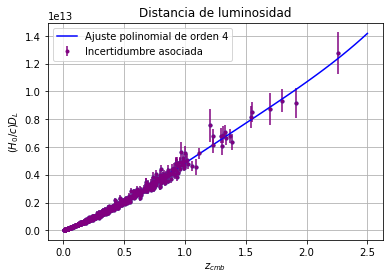

In [206]:
dD_H0_c = np.zeros_like(dD)
for i in range(len(dm_b)):
  dD_H0_c[i]= dD[i]*H_0/c

# Ajustar modelo polinomial grado 4
model = np.poly1d(np.polyfit(z_cmb, H_0*D_L/c, 4))

# Crear polilínea de diagrama de dispersión
polyline = np.linspace(0, 2.5, 50)
plt.plot(z_cmb, H_0*D_L/c, '.')

# Añadir líneas polinomiales ajustadas al diagrama de dispersión
plt.xlabel('$ z_{cmb} $')
plt.ylabel('$ (H_0/c) D_L $')
plt.errorbar(z_cmb, H_0*D_L/c, yerr=dD_H0_c, fmt='.', color='purple', label = 'Incertidumbre asociada')
plt.plot(polyline, model(polyline), color='blue', label = 'Ajuste polinomial de orden 4')
plt.title('Distancia de luminosidad')
plt.legend()
plt.grid(True)
plt.show()

Obtuvimos órdenes de magnitud distintos a los esperados. (Página 135, Ryden)

Con el objetivo de obtener $H_0$ se grafica $D_L$ en función de $cz$. Luego se obtiene la pendiente del ajuste para $z<<1$. Ésta pendiente entrega el valor de $H_0$. Como no pudimos seleccionar los 10 primeros datos, se hizo un ajuste lineal general.

Ecuación del ajuste:  
6.834e+10 x - 322.6
H_0 obtenido: 68335527160.27996


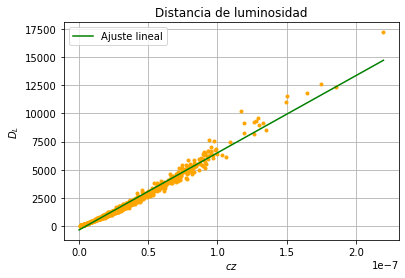

In [207]:
array_z = np.array(z_cmb)
c_z_cmb = c*array_z

plt.plot(c_z_cmb, D_L, '.', color = 'orange')
model4 = np.poly1d(np.polyfit(c_z_cmb, D_L, 1))
polyline4 = np.linspace(0, 2.2e-7, 50)
plt.plot(polyline4, model4(polyline4), color='green', label = 'Ajuste lineal')

print("Ecuación del ajuste:", model4)
print("H_0 obtenido:", model4[1])

plt.xlabel('$ cz $')
plt.ylabel('$ D_L$')
plt.title('Distancia de luminosidad')
plt.grid(True)
plt.legend()
plt.show()

<ipython-input-208-64ec28019ee0>:7: RuntimeWarning: divide by zero encountered in double_scalars
  derivada[i] = (func[i+1] - func[i]) / (2 * (z_cmb[i+1]- z_cmb[i]))


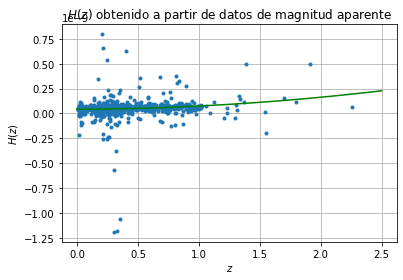

In [208]:
func= np.zeros_like(D_L)
for i in range(len(D_L)):
  func[i] = D_L[i]/(1+z_cmb[i])

derivada = np.zeros_like(D_L)
for i in range(len(D_L)-1):
  derivada[i] = (func[i+1] - func[i]) / (2 * (z_cmb[i+1]- z_cmb[i]))


H_DL = np.zeros_like(D_L)
for i in range(len(D_L)):
  if derivada[i] == 0:
    H_DL[i]=0
  else:
    H_DL[i] = c * (1/derivada[i])

#Sacándole un dato a H(z) para observar la distribución
for i in range(len(D_L)-1):
  if H_DL[i] >= 1 * (10**-9):
    H_DL[i] = 0

plt.plot(z_cmb, H_DL, '.')
model5 = np.poly1d(np.polyfit(z_cmb, H_DL, 2))
polyline5 = np.linspace(0, 2.5, 50)
plt.plot(polyline5, model5(polyline5), color='green', label = 'Ajuste polinomial de orden 2')

plt.xlabel('$ z $')
plt.ylabel('$ H(z)$')
plt.title('$H(z)$ obtenido a partir de datos de magnitud aparente')
plt.grid(True)
plt.show()

Se tiene que la amplitud del gráfico de $m-M$ en función de $log(z)$ cuando z tiende a 0, debe ser $H_0$

 
2.4 x + 43.87


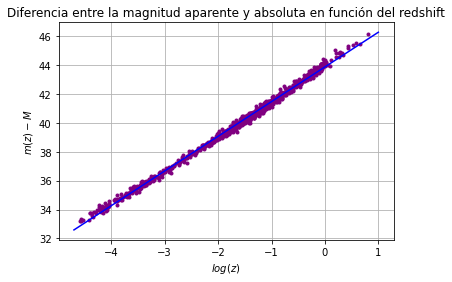

In [209]:
m_M= np.zeros_like(m_b)
for i in range(len(m_b)):
  m_M[i] = m_b[i] - M

plt.plot(np.log(z_cmb),m_M, '.', color='purple')

model = np.poly1d(np.polyfit(np.log(z_cmb), m_M, 1))
polyline = np.linspace(-4.7, 1, 50)
plt.plot(polyline, model(polyline), color='blue', label = 'Ajuste polinomial de orden 1')

print(model)


plt.xlabel('$ log(z) $')
plt.ylabel('$ m(z) - M$')
plt.title('Diferencia entre la magnitud aparente y absoluta en función del redshift')
plt.grid(True)
plt.show()

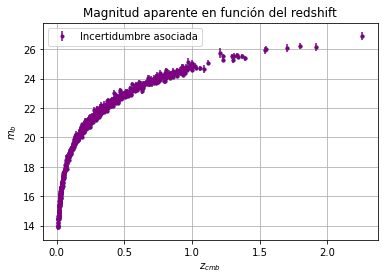

In [210]:
# Ajustar modelo polinomial grado 2
model = np.poly1d(np.polyfit(z_cmb, m_b, 2))

# Crear polilínea de diagrama de dispersión
polyline = np.linspace(0, 2.5, 50)
plt.plot(z_cmb, m_b, '.')

plt.xlabel('$ z_{cmb} $')
plt.ylabel('$ m_b $')
plt.errorbar(z_cmb, m_b, yerr=dm_b, fmt='.', color='purple', label = 'Incertidumbre asociada')
#plt.plot(polyline, model(polyline), color='blue', label = 'Ajuste polinomial de orden 2')
plt.title('Magnitud aparente en función del redshift')
plt.legend()
plt.grid(True)
plt.show()

Gráfico de magnitud aparente distinto al esperado (Dark energy in practice, pág 11)

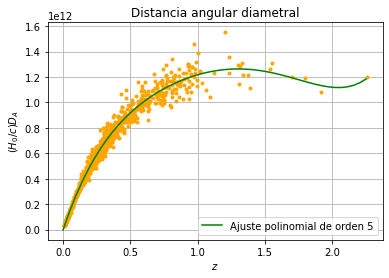

In [211]:
d_a1 = np.zeros_like(D_L)
for i in range(len(D_L)):
    d_a1[i] = D_L[i] * (1/((1+z_cmb[i])**2))

d_a_H0_c1 = np.zeros_like(D_L)
for i in range(len(D_L)):
    d_a_H0_c1[i] = d_a1[i]* H_0/c

plt.plot(z_cmb, d_a_H0_c1, '.', color = 'orange')

model4 = np.poly1d(np.polyfit(z_cmb, d_a_H0_c1, 5))
polyline4 = np.linspace(0, 2.25, 50)
plt.plot(polyline4, model4(polyline4), color='green', label = 'Ajuste polinomial de orden 5')


plt.xlabel('$ z $')
plt.ylabel('$ (H_0/c) D_A$')
plt.title('Distancia angular diametral')
plt.grid(True)
plt.legend()
plt.show()

A comparar con gráfico 7.4 (Ryden, pág 139) 

### Parámetro de Hubble H(z)

In [212]:
f = open("C:/Users/antoc/Downloads/PortableGit/practica2024/hub_data.txt")
#print(f.readlines())
lineas2 = f.readlines()

# Divide cada línea en columnas usando espacio como separador
datos_separados2 = [linea.strip().split(' ') for linea in lineas2]

datos= []
for fila in datos_separados2:
    datos.append(fila)
    #print(fila)

z = []
for i in range(len(datos)):
      a = float(datos[i][0])
      z.append(a)
#print('z:', z)

H = []
for i in range(len(datos)):
   if datos[i][1] == '':
      a = float(datos[i][2])
      H.append(a)
   else:
      a = float(datos[i][1])
      H.append(a)
#print('H:', H)

desv = []
for i in range(len(datos)):
    a = float(datos[i][2])
    desv.append(a)
#print('desv:', desv)


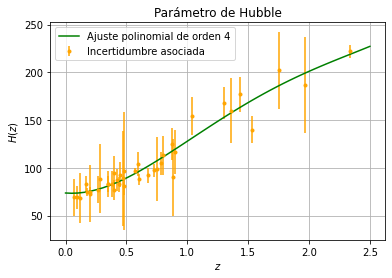

In [213]:
# Ajustar modelo polinomial grado 4
model = np.poly1d(np.polyfit(z, H, 4))

# Crear polilínea de diagrama de dispersión
polyline = np.linspace(0, 2.5, 50)


# Añadir líneas polinomiales ajustadas al diagrama de dispersión
plt.plot(polyline, model(polyline), color='green', label = 'Ajuste polinomial de orden 4')

yerr = desv
plt.xlabel('$ z $')
plt.ylabel('$ H(z) $')
plt.title('Parámetro de Hubble')
plt.errorbar(z, H, yerr=yerr, fmt='.', color = 'orange', label = 'Incertidumbre asociada')
plt.legend()
plt.grid(True)
plt.show()

Del mismo orden de magnitud esperado según "a 6% measurment of the Hubble parameter..." (página 14)

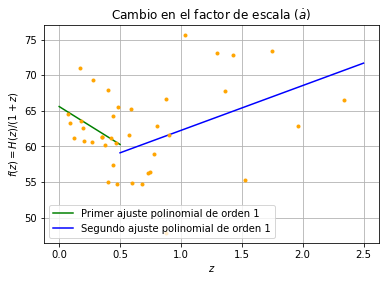

In [214]:
f = np.zeros_like(H)
for i in range(len(H)):
  f[i] = H[i]/(1+ z[i])

model2 = np.poly1d(np.polyfit(z[:20], f[:20], 1))
polyline2 = np.linspace(0, 0.5, 50)
plt.plot(polyline2, model2(polyline2), color='green', label = 'Primer ajuste polinomial de orden 1')
model3 = np.poly1d(np.polyfit(z[20:], f[20:], 1))
polyline3 = np.linspace(0.5, 2.5, 50)
plt.plot(polyline3, model3(polyline3), color='blue', label = 'Segundo ajuste polinomial de orden 1')

plt.xlabel('$ z $')
plt.ylabel('$ f(z) = H(z)/(1+z)$')
plt.title('Cambio en el factor de escala $(\dot{a})$')
plt.plot(z, f,'.', color = 'orange')
plt.legend()
plt.grid(True)
plt.show()

Del mismo orden de magnitud esperado según "a 6% measurment of the Hubble parameter..." (página 17)

Se obtuvo $D_L$ a partir de datos del parámetro de Hubble utilizando la ecuación $$D_L(z) = c \dfrac{1+z}{H_0} \int_0^z{dz}{\dfrac{1}{E(z)}}$$

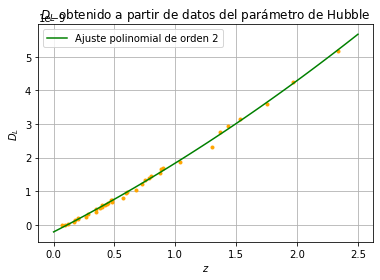

In [215]:
E = np.zeros_like(H)
for i in range(len(H)):
    E[i] = H[i]/H_0

def regla_trapecio_numerica(x, y, j):
    integral = 0
    n = j
    for i in range(1, n):
        integral += (x[i] - x[i - 1]) * (y[i] + y[i - 1])/2

    return integral

# Calcular la aproximación de la integral utilizando la regla del trapecio

resultado_integral = np.zeros_like(H)
for j in range(len(H)):
    resultado_integral[j] = regla_trapecio_numerica(z, 1/E, j)
    #print("El resultado de la integral es:", resultado_integral[j])

D_LH = np.zeros_like(H)
for i in range(len(H)):
    D_LH[i]= c * (1+ z[i])/ H_0 * resultado_integral[i]

plt.plot(z, D_LH, '.', color = 'orange')
model4 = np.poly1d(np.polyfit(z, D_LH, 2))
polyline4 = np.linspace(0, 2.5, 50)
plt.plot(polyline4, model4(polyline4), color='green', label = 'Ajuste polinomial de orden 2')

plt.xlabel('$ z $')
plt.ylabel('$ D_L$')
plt.title('$D_L$ obtenido a partir de datos del parámetro de Hubble')
plt.grid(True)
plt.legend()
plt.show()

Con el objetivo de obtener $H_0$ se grafica $D_L$ en función de $cz$. Luego se obtiene la pendiente del ajuste para $z<<1$. Ésta pendiente entrega el valor de $H_0$.

Ecuación del ajuste:  
0.01489 x - 1.202e-10
H_0 obtenido: 0.014891127599647967


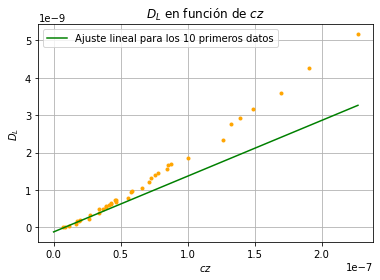

In [216]:
array_z = np.array(z)
c_z = c*array_z

plt.plot(c_z, D_LH, '.', color = 'orange')
model4 = np.poly1d(np.polyfit(c_z[:10], D_LH[:10], 1))
polyline4 = np.linspace(0, c_z[-1], 50)
plt.plot(polyline4, model4(polyline4), color='green', label = 'Ajuste lineal para los 10 primeros datos')

print("Ecuación del ajuste:", model4)
print("H_0 obtenido:", model4[1])

plt.xlabel('$ cz $')
plt.ylabel('$ D_L$')
plt.title('$D_L$ en función de $cz$')
plt.grid(True)
plt.legend()
plt.show()

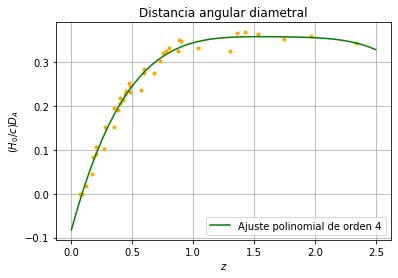

In [217]:
d_a = np.zeros_like(D_LH)
for i in range(len(D_LH)):
    d_a[i] = D_LH[i] * (1/((1+z[i])**2))

d_a_H0_c = np.zeros_like(D_LH)
for i in range(len(D_LH)):
    d_a_H0_c[i] = d_a[i]* H_0/c

plt.plot(z, d_a_H0_c, '.', color = 'orange')

model4 = np.poly1d(np.polyfit(z, d_a_H0_c, 4))
polyline4 = np.linspace(0, 2.5, 50)
plt.plot(polyline4, model4(polyline4), color='green', label = 'Ajuste polinomial de orden 4')


plt.xlabel('$ z $')
plt.ylabel('$ (H_0/c) D_A$')
plt.title('Distancia angular diametral')
plt.grid(True)
plt.legend()
plt.show()

A comparar con gráfico 7.4 (Ryden, pág 139) 